# Neural network models for the MNIST model

In [0]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


# ⚠️ You are only allowed to work with the imported layers to build your neural network.

In [0]:
import tensorflow as tf
import matplotlib.pyplot as pl
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Reshape, Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist

np.set_printoptions(suppress=True, precision=2)

# ✎ Import the MNIST dataset.

**Note** You must renormalize the pixel values to 1.0.  This involves dividing the image tensors by 255.

Load the data into variables:

- `x_train`
- `y_train`
- `x_test`
- `y_test`

In [0]:
# Load the data into x_train, y_train, x_test, y_test
#
# complete 
#
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


In [0]:
x_train.shape

(60000, 28, 28)

In [0]:
# Normalize the image pixels in x_train and y_train to 0 to 1.
#
#
# complete
#

x_train = x_train / 255
x_test = x_test / 255

x_train = x_train.reshape(-1,784)
x_test = x_test.reshape(-1, 784)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
y_train.shape

(60000,)

# ✎ Plot the digit images

You must plot, in a grid of subplots with layout (2, 5), **one** image
for each digit from 0 .. 9.

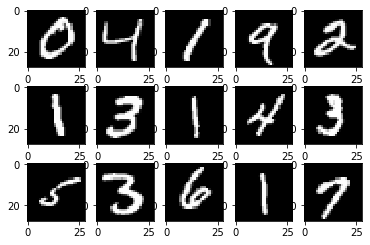

In [0]:
# Plot one image per different digit in a 2x5 subplot layout.
#
#
# complete
#for i in range(1, 11):
#   pl.subplot(3, 5, i)
#   pl.imshow(x_test[i], cmap='gray');
for i in range(1,16):
  pl.subplot(3, 5, i)
  first_image = x_train[i]
  first_image = np.array(first_image, dtype='float')
  pixels = first_image.reshape((28, 28))
  pl.imshow(pixels, cmap='gray')
            




In [0]:
type(x_train)

numpy.ndarray

# ✎ MLP with four layers

Construct a model, `model1`, that is a 4-layer MLP.  

- It maps the digit images to a probability distribution
over 10 classes, corresponding to 0..9.

- The model consists of *four* dense layers, each with 10 neurons.
Only the last layer uses activation function (`softmax`), while
the others do not use activation functions.

- Compile the model with the `sparse_categorical_crossentropy` loss function and
`Adam` optimizer.  Also include the accuracy metrics (`acc`) in the compiled model.

- Use `model1.summary()` to show the description of the model

In [0]:
# Construct the first model.
#
# Compile with sparse categorical crossentropy, and adam optimizer, and the 'acc' metric.
#
# comodel1
#
model1 = Sequential([
    Input((784)),
    Reshape((-1,784)),
    Dense(10),
    Dense(10), 
    Dense(10),
    Dense(10, activation='softmax')
])
model1.compile(optimizer= 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy'])
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, None, 784)         0         
_________________________________________________________________
dense (Dense)                (None, None, 10)          7850      
_________________________________________________________________
dense_1 (Dense)              (None, None, 10)          110       
_________________________________________________________________
dense_2 (Dense)              (None, None, 10)          110       
_________________________________________________________________
dense_3 (Dense)              (None, None, 10)          110       
Total params: 8,180
Trainable params: 8,180
Non-trainable params: 0
_________________________________________________________________


# ✎ Training

- Train the model, with `x_train` and `y_train`.
- Use 10 epochs.
- Use 10% of the training data for cross validation.
- Save the history of the training as variable `history1`.

In [0]:
# Train the model with the training data
# - Use 10% cross validation
# - 10 epochs
# - Save the history
#
# complete
#

history1 = model1.fit(
    x_train,
    y_train, 
    validation_split = 0.1,
    epochs = 10, 
    batch_size = 32
)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 9s 173us/sample - loss: 0.5351 - accuracy: 0.8432 - val_loss: 0.3044 - val_accuracy: 0.9132
Epoch 2/10
54000/54000 [==============================] - 8s 141us/sample - loss: 0.3409 - accuracy: 0.9021 - val_loss: 0.2555 - val_accuracy: 0.9255
Epoch 3/10
54000/54000 [==============================] - 8s 142us/sample - loss: 0.3059 - accuracy: 0.9142 - val_loss: 0.2481 - val_accuracy: 0.9283
Epoch 4/10
54000/54000 [==============================] - 8s 142us/sample - loss: 0.2932 - accuracy: 0.9190 - val_loss: 0.2453 - val_accuracy: 0.9307
Epoch 5/10
54000/54000 [==============================] - 8s 142us/sample - loss: 0.2877 - accuracy: 0.9206 - val_loss: 0.2352 - val_accuracy: 0.9357
Epoch 6/10
54000/54000 [==============================] - 8s 143us/sample - loss: 0.2833 - accuracy: 0.9204 - val_loss: 0.2485 - val_accuracy: 0.9327
Epoch 7/10
54000/54000 [===========================

In [0]:
x0_train = x_train[y_train == 0]
x1_train = x_train[y_train == 1]
x0_train.shape, x1_train.shape, x_train.dtype
Y_pred = model1.predict(x_train)

# ✎ Plot the accuracy and cross validation accuracy in two separate plots

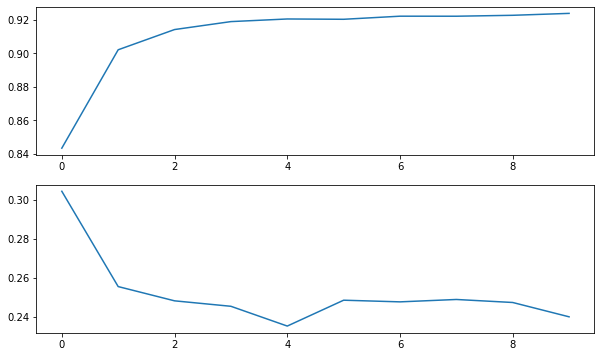

In [0]:
# Plot the training accuracy and cross validation accuracy
# Make two separate plots
#
# complete
#
pl.figure(figsize=(10, 6))
pl.subplot(2,1,1)
pl.plot(history1.history['accuracy']);


pl.subplot(2,1,2)
pl.plot(history1.history['val_loss']);


# ✎ Conclusion on overfitting

Do you think the model has overfitted to the training data?

## Your answer here:
yes
*
*
*
*
*




# ✎ Evaluate the model using the test data.

- Save the test accuracy in the variable `acc_test1`

# ✎ MLP with non-linear activation

- Construct a MLP with the same architecture as `model1`, except
that all **internal** layers use `relu` non-linear activation functions.

- Assign the model the variable `model2`.

- Use `model2.summary()` to show the model description.

In [0]:
# Evaluate the test accuracy using the test data x_test and y_test.
#
# complete
#
acc_test1 = model1.evaluate(
  x_test,
  y_test
)
acc_test1



10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.28793138418197634, 0.9233]

In [0]:
predictions = model1.predict(x_test[:1])
print (np.argmax(predictions, axis =1))
print(y_test[:1])

[[0 0 0 0 0 0 0 0 0 0]]
[7]


In [0]:
# Construct the second model
#
# Compile with sparse_categorical_crossentropy, adam optimizer and the 'acc' metrics
#
# complete
#

#


model2 = Sequential([
    Input((784)),
    Reshape((-1,784)),
    Dense(10, activation='relu'),
    Dense(10, activation='relu'), 
    Dense(10, activation='relu'),
    Dense(10, activation='softmax')                   
])
model2.compile(optimizer= 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, None, 784)         0         
_________________________________________________________________
dense_4 (Dense)              (None, None, 10)          7850      
_________________________________________________________________
dense_5 (Dense)              (None, None, 10)          110       
_________________________________________________________________
dense_6 (Dense)              (None, None, 10)          110       
_________________________________________________________________
dense_7 (Dense)              (None, None, 10)          110       
Total params: 8,180
Trainable params: 8,180
Non-trainable params: 0
_________________________________________________________________


# ✎ Train the model

- 10 epochs
- 10% cross-validation
- Save the history in `history2`.

In [0]:
# Train the model with the training data
# - Use 10% cross validation
# - 10 epochs
# - Save the history
#
# complete
#
history2 = model2.fit(
    
    x_train,
    y_train, 
    validation_split = 0.1,
    epochs = 10, 
    batch_size = 32

)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 9s 159us/sample - loss: 0.6105 - accuracy: 0.8157 - val_loss: 0.3094 - val_accuracy: 0.9075
Epoch 2/10
54000/54000 [==============================] - 8s 140us/sample - loss: 0.3240 - accuracy: 0.9072 - val_loss: 0.2660 - val_accuracy: 0.9232
Epoch 3/10
54000/54000 [==============================] - 8s 143us/sample - loss: 0.2811 - accuracy: 0.9181 - val_loss: 0.2471 - val_accuracy: 0.9260
Epoch 4/10
54000/54000 [==============================] - 8s 144us/sample - loss: 0.2548 - accuracy: 0.9258 - val_loss: 0.2340 - val_accuracy: 0.9307
Epoch 5/10
54000/54000 [==============================] - 8s 142us/sample - loss: 0.2386 - accuracy: 0.9300 - val_loss: 0.2094 - val_accuracy: 0.9402
Epoch 6/10
54000/54000 [==============================] - 8s 141us/sample - loss: 0.2275 - accuracy: 0.9322 - val_loss: 0.2033 - val_accuracy: 0.9393
Epoch 7/10
54000/54000 [===========================

# ✎ Plot the accuracy and cross validation accuracy in two separate plots

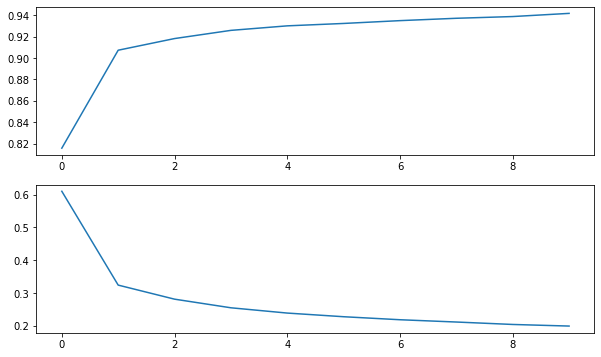

In [0]:
# Plot the training accuracy and cross validation accuracy
# Make two separate plots
#
# complete
#
pl.figure(figsize=(10, 6))
pl.subplot(2,1,1)
pl.plot(history2.history['accuracy']);


pl.subplot(2,1,2)
pl.plot(history2.history['loss']);

# ✎ Conclusion on overfitting

Do you think the model has overfitted?

## Your answer goes here.

*
*
*
*
*
*

# ✎ Evaluate `model2` with test data.

- Save the test accuracy in the variable `acc_test2`

In [0]:
# Evaluate the test accuracy using the test data x_test and y_test.
#
# complete
#
acc_test2 = model2.evaluate(
  x_test,
  y_test
)
acc_test2


10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.2227003667846322, 0.9353]

# ✎ Convolutional Networks

Build a convolutional network with the following architecture.

- Uses a Conv2D layer with 32 filters, each with kernel size of (3,3).
- Uses a MaxPool2D layer with pool size of (2,2).
- Uses a dense layer to generate the output.
- You must use `Reshape` layers whenever necessary to ensure the shapes of the tensors are suitable
for downstream layers.
- Assign the model as `model3`.
- Compile the model as before.

In [0]:
x_train.shape

(60000, 784)

In [0]:
x_train = x_train.reshape((60000,28,28))
x_train.shape

(60000, 28, 28)

In [0]:
# Construct the second model
#
# Compile with sparse_categorical_crossentropy, adam optimizer and the 'acc' metrics
#
# complete
#
model3 = Sequential([
    Input((28, 28)),
    Reshape((28,28,1)),
    Conv2D(32, kernel_size=(3, 3)),
    MaxPool2D(pool_size=(2,2)),
    Reshape((5408,)),
    Dense(10, activation='softmax')                   
])
model3.compile(optimizer= 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy'])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
reshape_3 (Reshape)          (None, 5408)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                54090     
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


# ✎ Train the model

- 10 epochs
- 10% cross-validation
- Save the history as `history3`

In [0]:
# Train the model with the training data
# - Use 10% cross validation
# - 10 epochs
# - Save the history
#
# complete
history3 = model3.fit( 
    x_train,
    y_train, 
    validation_split = 0.1,
    epochs = 10, 
    batch_size = 32)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 7s 136us/sample - loss: 0.2780 - accuracy: 0.9215 - val_loss: 0.1305 - val_accuracy: 0.9652
Epoch 2/10
54000/54000 [==============================] - 5s 85us/sample - loss: 0.1224 - accuracy: 0.9651 - val_loss: 0.0917 - val_accuracy: 0.9737
Epoch 3/10
54000/54000 [==============================] - 5s 87us/sample - loss: 0.0874 - accuracy: 0.9745 - val_loss: 0.0796 - val_accuracy: 0.9790
Epoch 4/10
54000/54000 [==============================] - 5s 85us/sample - loss: 0.0718 - accuracy: 0.9783 - val_loss: 0.0663 - val_accuracy: 0.9820
Epoch 5/10
54000/54000 [==============================] - 5s 85us/sample - loss: 0.0615 - accuracy: 0.9813 - val_loss: 0.0686 - val_accuracy: 0.9812
Epoch 6/10
54000/54000 [==============================] - 5s 87us/sample - loss: 0.0535 - accuracy: 0.9835 - val_loss: 0.0645 - val_accuracy: 0.9827
Epoch 7/10
54000/54000 [==============================] 

# ✎ Plot the accuracy and cross validation accuracy in two separate plots

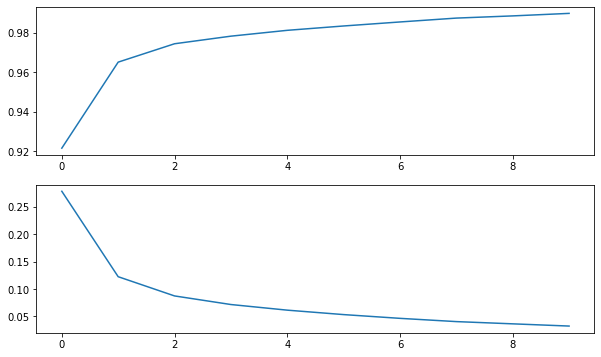

In [0]:
# Plot the training accuracy and cross validation accuracy
# Make two separate plots
#
# complete
#
pl.figure(figsize=(10, 6))
pl.subplot(2,1,1)
pl.plot(history3.history['accuracy']);


pl.subplot(2,1,2)
pl.plot(history3.history['loss']);

# ✎ Conclusion on overfitting

Do you think the model has overfitted?

## Your answer goes here.

*
*
*
*
*
*

# ✎ Evaluate `model2` with test data.

- Save the test accuracy in the variable `acc_test3`

In [0]:
# Evaluate the test accuracy using the test data x_test and y_test.
#
# complete
#
acc_test2 = model2.evaluate(
  x_test,
  y_test
)
acc_test2

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.2227003667846322, 0.9353]

# Comparative study

# ✎ Define a function that computes a _confusion matrix_.

Define a function `confusion_matrix(model)` as follows:

**Input**

- model: a MNIST classifier

**Returns**

- A (10,10) matrix of **int** which is the _confusion matrix_ with respect to the training
data of `(x_test, y_test)`.

The confusion matrix $C$ is defined as:  $C[i][j]$ is the number of
instances that digit $i$ is mistaken as $j$.  We **require** $C[i][i] = 0$ for all $i$.

In [0]:
#
# complete
#
def confusion_matrix(model):
  for i in range(i in 10):
    for j in range(j in 10):
      
    pass

IndentationError: ignored

# ✎ Define a function of printing _bad_ images of digit

Define a function `show_bad(model, digit)` to show 9 images of digit that have
been incorrectly classified.

**Input**:

- model: the classifier
- digit: the digit that the images belong to.  digit=0, 1, ... 9.

**Output**:

- None

The function plots in a 3x3 subplot layout 9 images that have been badly classified.  All 9 images are
supposed to be `digit`.

In [0]:
#
# complete
#
def show_bad(model, digit):
    pass

# ✎ Apply to models

- Compute the confusion matrices of all three models.
- Save them as variables `confusion1`, `confusion2` and `confusion3`.

# ✎ Show the bad digits of all three models

- Apply the `show_bad` to all three models

In [0]:
confusion1 = confusion_matrix(model1)
confusion1

In [0]:
show_bad(model1, digit=3)

In [0]:
confusion2 = confusion_matrix(model2)
confusion2

In [0]:
show_bad(model2, digit=3)

In [0]:
confusion3 = confusion_matrix(model3)
confusion3

In [0]:
show_bad(model3, digit=3)

In [0]:
# Conclusion

Draw your conclusions about the three models based on your observations of:

- Test accuracies
- Confusion matrices
- The mistakes the three models make

## Your answer goes here

*
*
*
*
*
*

---

# Testing your work

In [0]:
# -------------------------------
# training and test data shapes
# -------------------------------
assert(x_train.shape[1:] == (28, 28))
assert(x_test.shape[1:] == (28, 28))
assert(len(y_train.shape) == 1)
assert(len(y_test.shape) == 1)

# normalization
assert(np.max(x_train) <= 1.)
assert(np.max(x_test) <= 1.)

In [0]:
# model structure
assert(len(model1.layers) == 5)
expect = [((784, 10), (10,), tf.keras.activations.linear, Dense),
          ((10, 10), (10,), tf.keras.activations.linear, Dense),
          ((10, 10), (10,), tf.keras.activations.linear, Dense),
          ((10, 10), (10,), tf.keras.activations.softmax, Dense),
         ]
for i in range(4):
    layer = model1.layers[i+1]
    assert(layer.get_weights()[0].shape == expect[i][0])
    assert(layer.get_weights()[1].shape == expect[i][1])
    assert(layer.activation == expect[i][2])
    assert(isinstance(layer, expect[i][3]))

In [0]:
# history of training
assert(isinstance(history1, tf.keras.callbacks.History))
assert('acc' in history1.history)
assert('val_acc' in history1.history)

# training
acc = history1.history['acc']
val_acc = history1.history['val_acc']
assert(acc[0] < acc[-1])
assert(acc[-1] > 0.9)
assert(val_acc[-1] > 0.9)

In [0]:
# test accuracy
assert(acc_test1 > 0.9)

In [0]:
# model structure
assert(len(model1.layers) == 5)
expect = [((784, 10), (10,), tf.keras.activations.relu, Dense),
          ((10, 10), (10,), tf.keras.activations.relu, Dense),
          ((10, 10), (10,), tf.keras.activations.relu, Dense),
          ((10, 10), (10,), tf.keras.activations.softmax, Dense),
         ]
for i in range(4):
    layer = model2.layers[i+1]
    assert(layer.get_weights()[0].shape == expect[i][0])
    assert(layer.get_weights()[1].shape == expect[i][1])
    assert(layer.activation == expect[i][2])
    assert(isinstance(layer, expect[i][3]))

In [0]:
# history of training
assert(isinstance(history2, tf.keras.callbacks.History))
assert('acc' in history2.history)
assert('val_acc' in history2.history)

# training
acc = history2.history['acc']
val_acc = history2.history['val_acc']
assert(acc[0] < acc[-1])
assert(acc[-1] > 0.9)
assert(val_acc[-1] > 0.9)

In [0]:
# test accuracy
assert(acc_test2 > 0.9)

In [0]:
# model structure
assert(len(model3.layers) == 5)
layer = model3.layers[0]
assert(isinstance(layer, Reshape))

layer = model3.layers[1]
assert(isinstance(layer, Conv2D))

layer = model3.layers[2]
assert(isinstance(layer, MaxPool2D))

layer = model3.layers[3]
assert(isinstance(layer, Reshape))

layer = model3.layers[4]
assert(isinstance(layer, Dense))
assert(layer.activation == tf.keras.activations.softmax)

In [0]:
# history of training
assert(isinstance(history3, tf.keras.callbacks.History))
assert('acc' in history3.history)
assert('val_acc' in history3.history)

# training
acc = history3.history['acc']
val_acc = history3.history['val_acc']
assert(acc[0] < acc[-1])
assert(acc[-1] > 0.95)
assert(val_acc[-1] > 0.95)

In [0]:
# test accuracy
assert(acc_test3 > 0.95)

In [0]:
# confusion matrix
assert(confusion1.shape == (10, 10))
assert(np.sum(np.diag(confusion1)) == 0)

In [0]:
# confusion matrix
assert(confusion2.shape == (10, 10))
assert(np.sum(np.diag(confusion2)) == 0)

In [0]:
# confusion matrix
assert(confusion3.shape == (10, 10))
assert(np.sum(np.diag(confusion3)) == 0)